In [1]:
# %run -i "../../initjupyter_ng.py"

In [2]:
# set_plots_subdir('UndergroundMuons')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.lines as mlines
from scipy.interpolate import UnivariateSpline
from tqdm import tqdm

In [2]:
from mute.underground import _do_convolution, calc_u_intensities
from mute.propagation import load_survival_probability_tensor_from_file
import mute.constants as mtc

In [2]:
from MCEq.version import __version__
print(__version__)

1.2.6


In [3]:
from MCEq.core import MCEqRun
import mceq_config as config
import crflux.models as pm

In [4]:
config.enable_default_tracking = True
# config.e_min = 1e-1 # This is the lowest stable limit 60 MeV
config.e_max = 1e10
config.debug_level = 1
# config.dXmax = 10.
# config.generic_losses_all_charged = True
config.excpt_on_missing_particle = True
config.muon_helicity_dependence = False
#: File name of the MCEq database
# em_db_fname = "mceq_db_EM_Tsai_Full_v131.h5"

In [5]:
# Average mass number may be wrong but not relevant
mceq_air = MCEqRun(
    interaction_model = 'SIBYLL23C',
    theta_deg = 0.0,
    primary_model = (pm.GlobalSplineFitBeta, None),
#     density_model = ('MSIS00',('SoudanMine','January')),
)

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): GlobalSplineFitBeta 


In [6]:
mceq_air.set_theta_deg(0)
mceq_air.solve()
plt.loglog(mceq_air.e_grid, mceq_air.get_solution('mu+', mag=3))

Exception: solv_CUDA_sparse(): Numbapro CUDA libaries not installed.
Can not use GPU.

In [10]:
# # PROPOSAL results

# PROPOSAL_x = [2.00000000e+00, 2.00685443e+00, 2.02765457e+00, 2.06313127e+00, 2.11457342e+00, 2.18394655e+00, 2.27408720e+00, 2.38901109e+00, 2.53440290e+00, 2.71841104e+00, 2.95298157e+00, 3.25620092e+00, 3.65665368e+00, 4.20214508e+00, 4.97889663e+00, 6.15954192e+00, 8.14712109e+00, 1.21510675e+01, 2.42191307e+01, 1.14591557e+09]
# PROPOSAL_y = [1.11036139e-07, 1.11708930e-07, 1.06427137e-07, 9.72648780e-08, 8.55542148e-08, 7.74027516e-08, 6.95806475e-08, 5.65850825e-08, 4.14729638e-08, 3.21615855e-08, 2.26151268e-08, 1.46153060e-08, 8.51132005e-09, 3.63001737e-09, 1.88533649e-09, 4.21091362e-10, 4.85567868e-11, 5.58727887e-13, 2.28847565e-19, 1.45208874e-14]
# LVD data

LVD_x = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9, 5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.5, 7.7, 7.9, 8.1, 8.3, 8.5, 8.7, 8.9, 9.25, 9.75, 10.25, 10.75, 11.25, 11.75]
LVD_y = [2.17e-8, 1.65e-8, 1.23e-8, 9.24e-9, 7.04e-9, 5.37e-9, 4.12e-9, 3.19e-9, 2.47e-9, 1.99e-9, 1.50e-9, 1.16e-9, 8.99e-10, 6.79e-10, 5.52e-10, 4.34e-10, 3.53e-10, 2.68e-10, 2.27e-10, 1.88e-10, 1.40e-10, 1.14e-10, 9.32e-11, 6.85e-11, 5.65e-11, 4.45e-11, 3.80e-11, 2.97e-11, 2.51e-11, 2.11e-11, 1.40e-11, 7.9e-12, 4.5e-12, 2.7e-12, 2.2e-12, 1.4e-12]
LVD_yerr = [0.02e-8, 0.02e-8, 0.01e-8, 0.09e-9, 0.07e-9, 0.06e-9, 0.04e-9, 0.04e-9, 0.03e-9, 0.03e-9, 0.02e-9, 0.02e-9, 0.14e-10, 0.12e-10, 0.10e-10, 0.09e-10, 0.08e-10, 0.07e-10, 0.07e-10, 0.07e-10, 0.05e-10, 0.05e-10, 0.39e-11, 0.32e-11, 0.29e-11, 0.24e-11, 0.26e-11, 0.25e-11, 0.27e-11, 0.26e-11, 0.16e-11, 1.2e-12, 1.0e-12, 0.8e-12, 0.7e-12, 0.8e-12]

# SNO data

SNO_x = [6225, 6275, 6325, 6375, 6425, 6475, 6525, 6575, 6625, 6675, 6725, 6775, 6825, 6875, 6925, 6975, 7025, 7075, 7125, 7175, 7225, 7275, 7325, 7375, 7425, 7475, 7525, 7575, 7700, 7900, 8100, 8300, 8500, 8700, 8900, 9100, 9300, 9500, 9700, 9900, 10250, 10750, 11250, 11750, 12250, 12750, 13250, 13750, 14250, 14750, 15250]
SNO_y = [3.71e-10, 3.47e-10, 3.20e-10, 3.05e-10, 2.95e-10, 2.75e-10, 2.53e-10, 2.42e-10, 2.23e-10, 2.07e-10, 1.94e-10, 1.84e-10, 1.77e-10, 1.63e-10, 1.52e-10, 1.36e-10, 1.35e-10, 1.25e-10, 1.18e-10, 1.13e-10, 1.07e-10, 9.40e-11, 9.33e-11, 8.69e-11, 8.33e-11, 8.05e-11, 7.30e-11, 7.67e-11, 6.13e-11, 5.03e-11, 3.97e-11, 3.24e-11, 2.60e-11, 2.08e-11, 1.60e-11, 1.44e-11, 1.09e-11, 8.7e-12, 7.1e-12, 6.5e-12, 4.3e-12, 2.6e-12, 1.6e-12, 1.0e-12, 6.0e-13, 5.7e-13, 2.7e-13, 2.0e-13, 2.3e-13, 1.5e-13, 2.9e-13]
SNO_yerr = [0.53e-10, 0.50e-10, 0.46e-10, 0.44e-10, 0.43e-10, 0.40e-10, 0.37e-10, 0.36e-10, 0.33e-10, 0.31e-10, 0.29e-10, 0.38e-10, 0.27e-10, 0.25e-10, 0.24e-10, 0.21e-10, 0.21e-10, 0.20e-10, 0.19e-10, 0.18e-10, 0.17e-10, 1.50e-11, 1.50e-11, 1.40e-11, 1.40e-11, 1.30e-11, 1.20e-11, 1.30e-11, 1.00e-11, 0.86e-11, 0.69e-11, 0.58e-11, 0.47e-11, 0.39e-11, 0.31e-11, 0.28e-11, 0.22e-11, 1.8e-12, 1.5e-12, 1.4e-12, 0.9e-12, 0.6e-12, 0.4e-12, 0.3e-12, 1.8e-13, 1.7e-13, 1.0e-13, 0.8e-13, 0.9e-13, 0.7e-13, 1.1e-13]

# MACRO data

MACRO_x = [3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4762, 4850, 4950, 5050, 5150, 5250, 5350, 5450, 5550, 5650, 5750, 5850, 5950, 6050, 6150, 6250, 6350, 6450, 6550, 6650, 6750, 6850, 6950]
MACRO_y = [2.00e-8, 1.85e-8, 1.73e-8, 1.59e-8, 1.48e-8, 1.39e-8, 1.30e-8, 1.215e-8, 1.144e-8, 1.058e-8, 1.000e-8, 9.44e-9, 8.85e-9, 8.23e-9, 7.73e-9, 7.20e-9, 6.75e-9, 6.37e-9, 5.88e-9, 5.49e-9, 5.15e-9, 4.82e-9, 4.51e-9, 4.21e-9, 3.94e-9, 3.69e-9, 3.46e-9, 3.29e-9, 3.05e-9, 2.92e-9, 2.72e-9, 2.61e-9, 2.32e-9, 2.02e-9, 1.86e-9, 1.60e-9, 1.40e-9, 1.28e-9, 1.05e-9, 9.6e-10, 8.7e-10, 7.5e-10, 6.8e-10, 5.8e-10, 5.2e-10, 4.6e-10, 4.3e-10, 3.6e-10, 3.2e-10, 2.7e-10, 2.7e-10, 2.2e-10, 2.2e-10, 2.0e-10]
MACRO_yerr = [0.01e-8, 0.01e-8, 0.01e-8, 0.01e-8, 0.01e-8, 0.01e-8, 0.01e-8, 0.008e-8, 0.008e-8, 0.007e-8, 0.007e-8, 0.07e-9, 0.06e-9, 0.06e-9, 0.07e-9, 0.07e-9,0.06e-9, 0.06e-9, 0.06e-9, 0.06e-9, 0.05e-9, 0.06e-9, 0.05e-9, 0.07e-9, 0.07e-9, 0.09e-9, 0.03e-9, 0.07e-9, 0.07e-9, 0.04e-9, 0.06e-9, 0.04e-9, 0.06e-9, 0.06e-9, 0.03e-9, 0.04e-9, 0.02e-9, 0.04e-9, 0.03e-9, 0.2e-10, 0.2e-10, 0.1e-10, 0.2e-10, 0.5e-10, 0.3e-10, 0.2e-10, 0.1e-10, 0.7e-10, 0.4e-10, 0.3e-10, 0.5e-10, 0.3e-10, 0.3e-10, 0.3e-10]

In [11]:
# data = np.loadtxt("TM_3km_65_1e5.txt")
# d0 = 3.
mute_tensor = load_survival_probability_tensor_from_file("rock_2.65_1000000_Survival_Probabilities.txt")
# d0 = 1.

Loading survival probabilities from rock_2.65_1000000_Survival_Probabilities.txt.
Loaded survival probabilities.


In [12]:
mute_tensor.shape

(28, 91, 91)

In [13]:
def get_bins_and_width_from_centers(vector):
    vector_log = np.log10(vector)
    steps = vector_log[1] - vector_log[0]
    bins_log = vector_log - 0.5 * steps
    bins_log = np.resize(bins_log, vector_log.size + 1)
    bins_log[-1] = vector_log[-1] + 0.5 * steps
    bins = 10**bins_log
    widths = bins[1:] - bins[:-1]
    return bins, widths

In [14]:
e_sel = mceq_air.e_grid < 1e8
e_surf = mtc.ENERGIES/1e3
e_un = mtc.ENERGIES/1e3
mute_depths = mtc.slant_depths
# b, w = get_bins_and_width_from_centers(e_surf)

In [15]:
cnorm = Normalize(mute_depths[0],mute_depths[-1])
s_m = cm.ScalarMappable(cmap=cm.magma_r, norm=cnorm)
s_m.set_array([])

In [16]:
mute_tensor[:,0,60].shape

(28,)

C:\Users\afedy\AppData\Local\Temp\ipykernel_43648\380148803.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(e_surf, e_un, np.log10(mute_tensor[0,:,:]),cmap=cm.magma)


[]

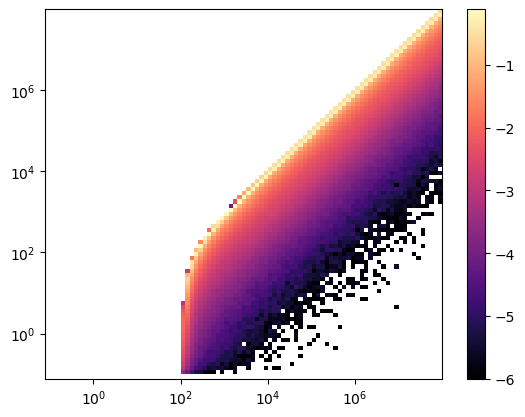

In [18]:
plt.pcolormesh(e_surf, e_un, np.log10(mute_tensor[0,:,:]),cmap=cm.magma)
plt.colorbar()
plt.loglog()

In [19]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [20]:
# mag = 0

# mceq_air.set_primary_model(pm.GlobalSplineFitBeta, None)
# mceq_air.set_theta_deg(0)
# mceq_air.solve()
# muons_surf_mq = mceq_air.get_solution('mu+', mag=mag) + mceq_air.get_solution('mu-', mag=mag)
# muons_surf = np.exp(np.interp(np.log(e_surf), np.log(mceq_air.e_grid), np.log(muons_surf_mq)))
# muons_surf_pi = np.exp(np.interp(np.log(e_surf), np.log(mceq_air.e_grid), 
#     np.log(mceq_air.get_solution('pi_mu+', mag=mag) + mceq_air.get_solution('pi_mu-', mag=mag))))
# muons_surf_k = np.exp(np.interp(np.log(e_surf), np.log(mceq_air.e_grid), 
#     np.log(mceq_air.get_solution('k_mu+', mag=mag) + mceq_air.get_solution('k_mu-', mag=mag))))
# muons_surf_pr = np.exp(np.interp(np.log(e_surf), np.log(mceq_air.e_grid), 
#     np.log(mceq_air.get_solution('pr_mu+', mag=mag) + mceq_air.get_solution('pr_mu-', mag=mag))))

# muons_surf_un = np.exp(np.interp(np.log(e_un), np.log(mceq_air.e_grid), np.log(muons_surf_mq)))
    

In [21]:
mag = 0

mceq_air.set_primary_model(pm.GlobalSplineFitBeta, None)
mceq_air.set_theta_deg(0)
mceq_air.solve()
muons_surf = (mceq_air.get_solution('mu+', mag=mag) + mceq_air.get_solution('mu-', mag=mag))[e_sel]
muons_surf_pi = (mceq_air.get_solution('pi_mu+', mag=mag) + mceq_air.get_solution('pi_mu-', mag=mag))[e_sel]
muons_surf_k = (mceq_air.get_solution('k_mu+', mag=mag) + mceq_air.get_solution('k_mu-', mag=mag))[e_sel]
muons_surf_pr = (mceq_air.get_solution('pr_mu+', mag=mag) + mceq_air.get_solution('pr_mu-', mag=mag))[e_sel]

MCEqRun::set_primary_model(): Primary model set to Global Spline Fit


In [22]:
muons_surf_angles = []
mceq_air.set_primary_model(pm.GlobalSplineFitBeta, None)
for ang in tqdm([0]):
    mceq_air.set_theta_deg(ang)
    mceq_air.solve()
    muons_surf_angles.append((mceq_air.get_solution('mu+', mag=mag) + mceq_air.get_solution('mu-', mag=mag))[e_sel])

MCEqRun::set_primary_model(): Primary model set to Global Spline Fit


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


In [23]:
from daemonflux import Flux

In [24]:
dmnflx = Flux()
dmnflx_wdeis = Flux(cal_file="E:\synology\SynologyDrive\devel\git\phantom\src\daemonflux\data\daemonsplines_calibration_with_deis_202303_1.pkl")

In [25]:
dmn_muons_surf = e_surf**-3*dmnflx.flux(grid=e_surf,zenith_deg=[0.],quantity="total_muflux")
# dmn_muons_surf_angles = (e_surf**-3*dmnflx.flux(grid=e_surf,zenith_deg=angles,quantity="total_muflux").T).T
dmnnd_muons_surf = e_surf**-3*dmnflx_wdeis.flux(grid=e_surf,zenith_deg=[0.],quantity="total_muflux")
# dmnnd_muons_surf_angles = (e_surf**-3*dmnflx_wdeis.flux(grid=e_surf,zenith_deg=angles,quantity="total_muflux").T).T

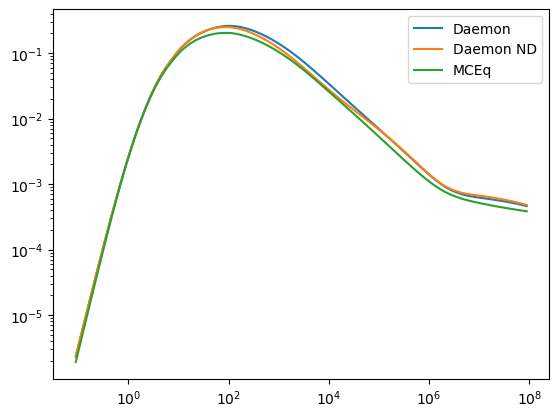

In [26]:
plt.loglog(e_surf, e_surf**3*dmn_muons_surf, label='Daemon')
plt.loglog(e_surf, e_surf**3*dmnnd_muons_surf, label='Daemon ND')
plt.loglog(e_surf, e_surf**3*muons_surf, label='MCEq')
plt.legend()

In [29]:
def get_underground_flux(surf_flux):
    return _do_convolution(np.atleast_2d(surf_flux).T, mute_tensor).squeeze()

def get_underground_rates(depths_kmwe, surf_flux):
    intensities = np.trapz(get_underground_flux(surf_flux), e_un, axis=1)
    return np.exp(np.interp(depths_kmwe, mute_depths, np.log(intensities)))

In [ ]:
def interp_data(d, intensity, xd):
    return np.exp(np.interp(xd, d, np.log(intensity)))

In [ ]:
import pickle
bart_egrid, bart_angles, bart_muflux, bart_muerror = pickle.load(
    open('../William_Marie_Underground_Muons/SIBYLL_BartolUnc_fluxes_William_20210527.pkl','rb'))
ddm_egrid, ddm_angles, ddm_muflux, ddm_muerror = pickle.load(open('../William_Marie_Underground_Muons/DDM_ICRC_William.pkl','rb'))

In [ ]:
ddm_muflux2 = ddm_muflux[0][ddm_egrid < 1e8]/ddm_egrid[ddm_egrid < 1e8]**3
ddm_muerror2 = ddm_muerror[0][ddm_egrid < 1e8]/ddm_egrid[ddm_egrid < 1e8]**3
dmn_muons_surf_err = e_surf**-3*dmnflx.error(grid=e_surf,zenith_deg=[0.],quantity="muflux")
dmnnd_muons_surf_err = e_surf**-3*dmnflx_wdeis.error(grid=e_surf,zenith_deg=[0.],quantity="muflux")
bart_muflux = [bart_muflux[i][bart_egrid < 1e8] for i in range(len(bart_muflux))]
bart_muerror = [bart_muerror[i][bart_egrid < 1e8] for i in range(len(bart_muerror))]

In [ ]:
assert np.allclose(bart_egrid[bart_egrid  < 1e8], mceq_air.e_grid[e_sel])

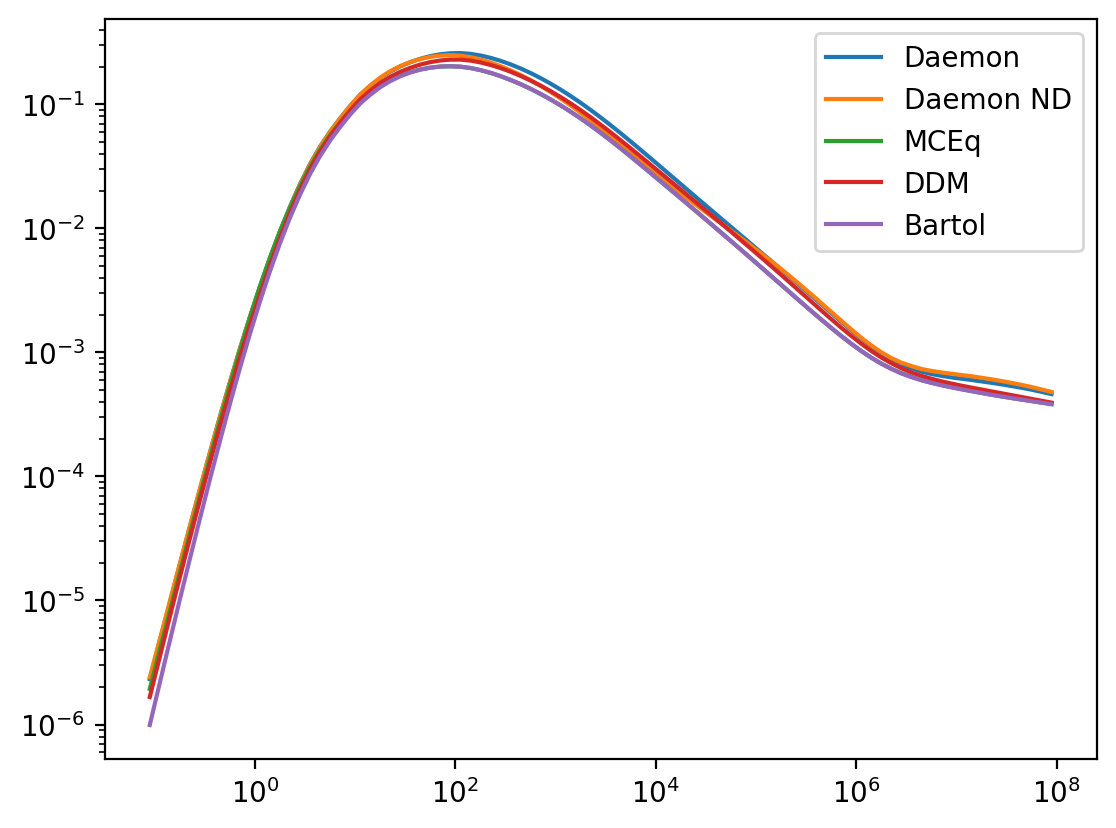

In [ ]:
plt.loglog(e_surf, e_surf**3*dmn_muons_surf, label='Daemon')
plt.loglog(e_surf, e_surf**3*dmnnd_muons_surf, label='Daemon ND')
plt.loglog(e_surf, e_surf**3*muons_surf, label='MCEq')
plt.loglog(e_surf, e_surf**3*ddm_muflux2, label='DDM')
plt.loglog(e_surf, e_surf**3*bart_muflux[0], label='Bartol')
plt.legend()

In [ ]:
mceq_air.set_theta_deg(0)
mceq_air.set_primary_model(pm.GlobalSplineFitBeta(None))
depths = np.linspace(1,13,50)
ddm_rates = get_underground_rates(depths,ddm_muflux2)
ddm_plus = get_underground_rates(depths,(ddm_muflux2 + ddm_muerror2))
ddm_minus = get_underground_rates(depths,(ddm_muflux2 - ddm_muerror2))
sib_rates = get_underground_rates(depths,bart_muflux[0])
sib_plus = get_underground_rates(depths,(bart_muflux[0] + bart_muerror[0]))
sib_minus = get_underground_rates(depths,(bart_muflux[0] - bart_muerror[0]))
dmn_rates = get_underground_rates(depths,dmn_muons_surf)
dmn_plus = get_underground_rates(depths,(dmn_muons_surf + dmn_muons_surf_err))
dmn_minus = get_underground_rates(depths,(dmn_muons_surf - dmn_muons_surf_err))
dmnnd_rates = get_underground_rates(depths,dmnnd_muons_surf)
dmnnd_plus = get_underground_rates(depths,(dmnnd_muons_surf + dmnnd_muons_surf_err))
dmnnd_minus = get_underground_rates(depths,(dmnnd_muons_surf - dmnnd_muons_surf_err))


MCEqRun::set_primary_model(): Primary model set to Global Spline Fit


In [ ]:
ddm_plus/ddm_rates

array([1.15712736, 1.1542618 , 1.15140333, 1.14984763, 1.14835032,
       1.1476983 , 1.14712331, 1.14709736, 1.14714982, 1.14754937,
       1.14801852, 1.14868505, 1.1494039 , 1.15018769, 1.15099351,
       1.15177757, 1.15255296, 1.15325114, 1.15391086, 1.15446168,
       1.15494716, 1.15531608, 1.15560169, 1.15578286, 1.15587561,
       1.15588135, 1.15580007, 1.15565501, 1.1554346 , 1.155172  ,
       1.15485035, 1.15450451, 1.15411829, 1.15372584, 1.15332081,
       1.15291495, 1.15250689, 1.15210666, 1.15172963, 1.15136119,
       1.15102503, 1.1506992 , 1.15042462, 1.15015741, 1.14994144,
       1.14973143, 1.14958667, 1.14944465, 1.1493655 , 1.14928636])

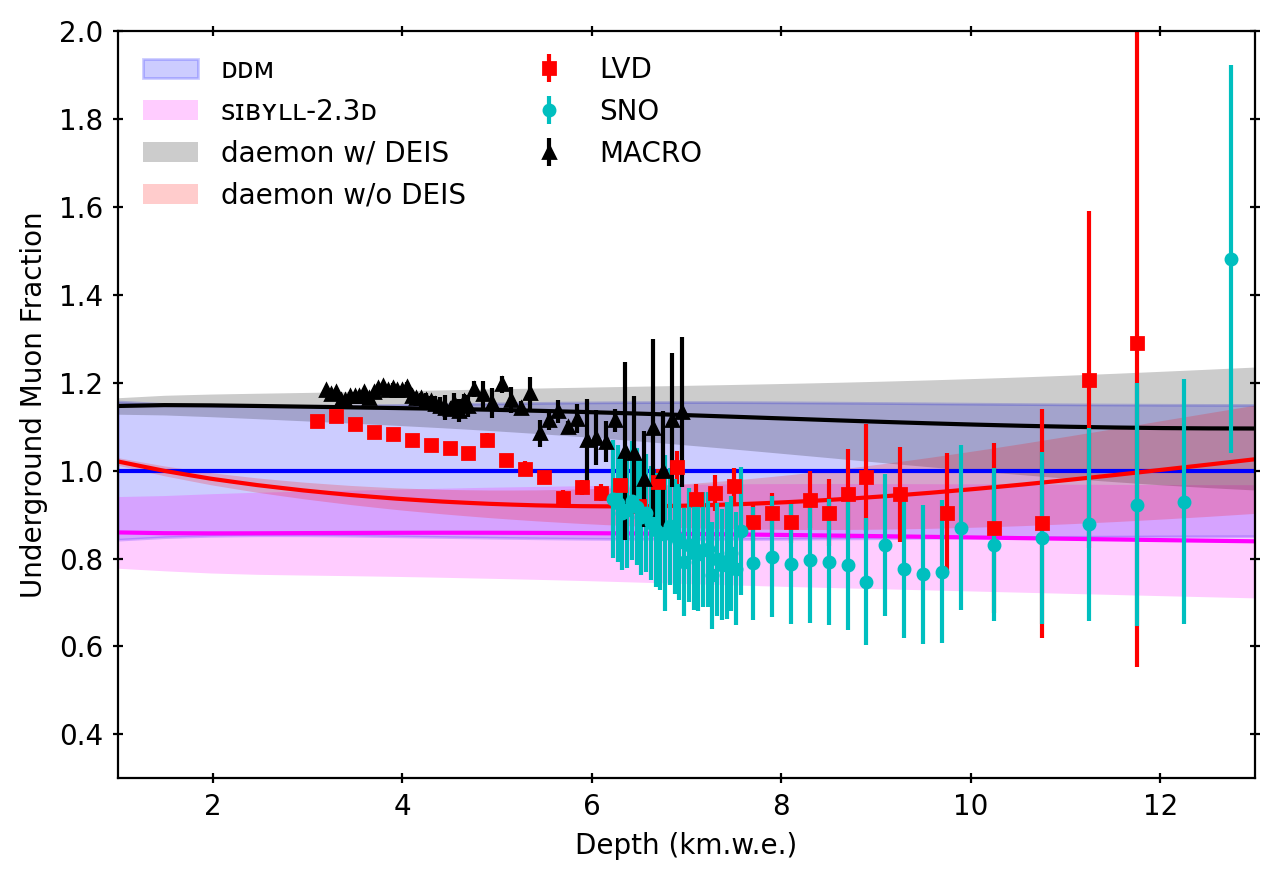

In [ ]:
plt.figure(figsize=(6.5,4.5))
ref_rate = ddm_rates
add_fmt = {'ms':4.}
plt.fill_between(depths, ddm_plus/ref_rate, ddm_minus/ref_rate,
            facecolor='b',edgecolor='b', alpha=.2,label='ᴅᴅᴍ')
lddm, = plt.plot(depths, ddm_rates/ref_rate, ls='solid', color='b')
lsib, = plt.plot(depths, sib_rates/ref_rate, ls='-', color='magenta')
plt.fill_between(depths, sib_plus/ref_rate, sib_minus/ref_rate,# hatch='///',
                 facecolor='magenta', lw=0.,alpha=.2, edgecolor='magenta',
                 label=r'sɪʙʏʟʟ-2.3ᴅ')
lddm, = plt.plot(depths, dmn_rates/ref_rate, ls='solid', color='k')
plt.fill_between(depths, dmn_plus/ref_rate, dmn_minus/ref_rate,# hatch='///',
                 facecolor='k', lw=0.,alpha=.2, edgecolor='k',
                 label='daemon w/ DEIS')
lsib, = plt.plot(depths, dmnnd_rates/ref_rate, ls='-', color='red')
plt.fill_between(depths, dmnnd_plus/ref_rate, dmnnd_minus/ref_rate,# hatch='///',
                 facecolor='red', lw=0.,alpha=.2, edgecolor='red',
                 label='daemon w/o DEIS')
ref_lvd = interp_data(depths, ref_rate, LVD_x)
plt.errorbar(LVD_x, LVD_y/ref_lvd, yerr=LVD_yerr/ref_lvd, fmt='rs',label='LVD', **add_fmt)
ref_sno = interp_data(depths, ref_rate, np.asanyarray(SNO_x)/1e3)
plt.errorbar(np.asanyarray(SNO_x)/1e3, SNO_y/ref_sno, yerr=SNO_yerr/ref_sno, fmt='co',label='SNO', facecolor=None, **add_fmt)
ref_macro = interp_data(depths, ref_rate, np.asanyarray(MACRO_x)/1e3)
plt.errorbar(np.asanyarray(MACRO_x)/1e3, MACRO_y/ref_macro, yerr=MACRO_yerr/ref_macro, fmt='k^',label='MACRO', **add_fmt)
plt.xlim(1,13)
plt.ylim(.3,2.0)
plt.xlabel('Depth (km.w.e.)')
plt.ylabel('Underground Muon Fraction')
plt.legend(frameon=False, loc='upper left', ncol=2)
plt.gca().tick_params(
    axis='both', which='both', right=True, top=True, direction='inout')
plt.tight_layout()
plt.savefig('underground_vertical_intensity_daemon_DEIS_check.pdf', dpi=200)
# save('meson_fraction_underground')

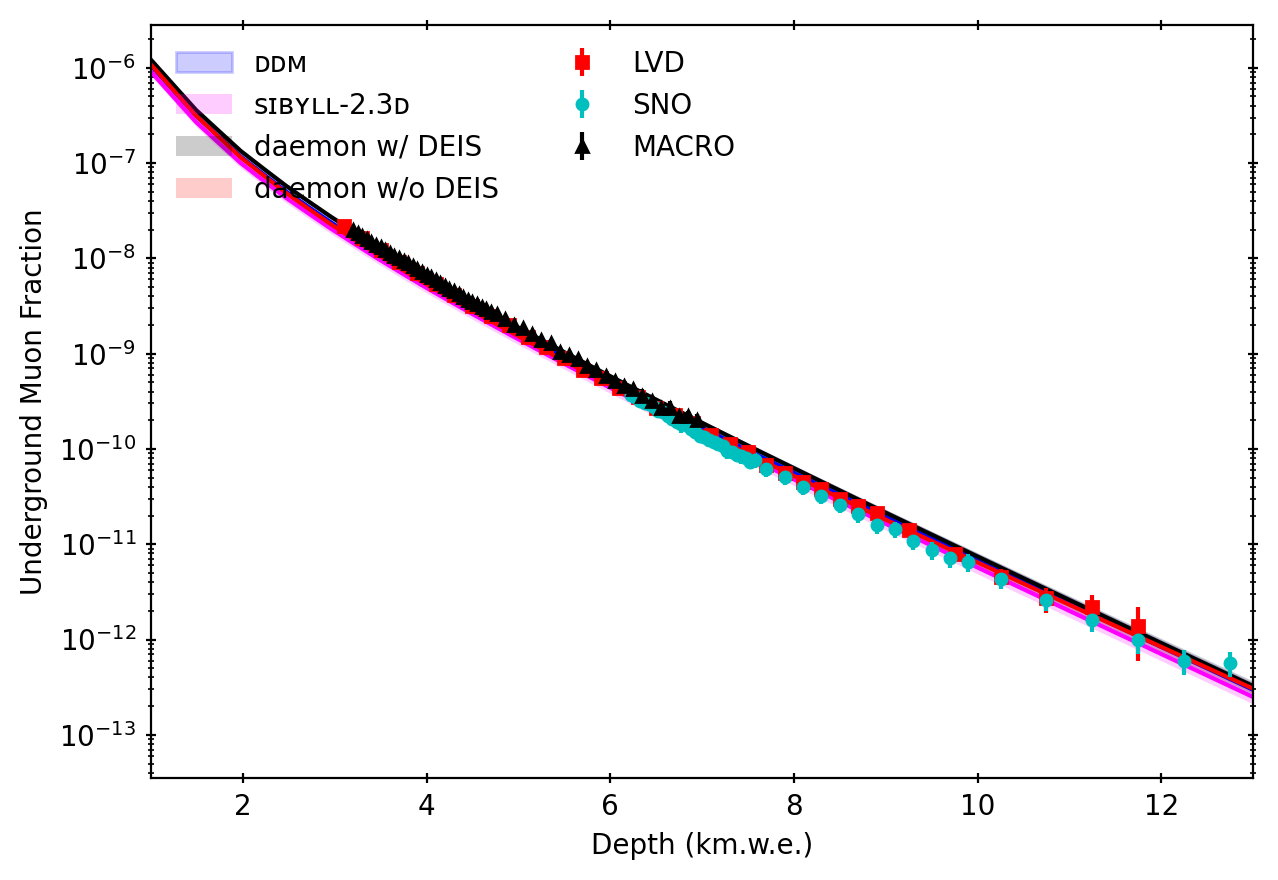

In [ ]:
plt.figure(figsize=(6.5,4.5))
add_fmt = {'ms':4.}
plt.fill_between(depths, ddm_plus, ddm_minus,
            facecolor='b',edgecolor='b', alpha=.2,label='ᴅᴅᴍ')
lddm, = plt.plot(depths,ddm_rates, ls='solid', color='b')
lsib, = plt.plot(depths, sib_rates, ls='-', color='magenta')
plt.fill_between(depths, sib_plus, sib_minus,# hatch='///',
                 facecolor='magenta', lw=0.,alpha=.2, edgecolor='magenta',
                 label=r'sɪʙʏʟʟ-2.3ᴅ')
lddm, = plt.plot(depths, dmn_rates, ls='solid', color='k')
plt.fill_between(depths, dmn_plus, dmn_minus,# hatch='///',
                 facecolor='k', lw=0.,alpha=.2, edgecolor='k',
                 label='daemon w/ DEIS')
lsib, = plt.plot(depths, dmnnd_rates, ls='-', color='red')
plt.fill_between(depths, dmnnd_plus, dmnnd_minus,# hatch='///',
                 facecolor='red', lw=0.,alpha=.2, edgecolor='red',
                 label='daemon w/o DEIS')
plt.errorbar(LVD_x, LVD_y, yerr=LVD_yerr, fmt='rs',label='LVD', **add_fmt)
plt.errorbar(np.asanyarray(SNO_x)/1e3, SNO_y, yerr=SNO_yerr, fmt='co',label='SNO', facecolor=None, **add_fmt)
plt.errorbar(np.asanyarray(MACRO_x)/1e3, MACRO_y, yerr=MACRO_yerr, fmt='k^',label='MACRO', **add_fmt)
plt.xlim(1,13)
plt.semilogy()
# plt.ylim(.3,2.0)
plt.xlabel('Depth (km.w.e.)')
plt.ylabel('Underground Muon Fraction')
plt.legend(frameon=False, loc='upper left', ncol=2)
plt.gca().tick_params(
    axis='both', which='both', right=True, top=True, direction='inout')
plt.tight_layout()
plt.savefig('underground_vertical_intensity_daemon_DEIS_check.pdf', dpi=200)
# save('meson_fraction_underground')

In [ ]:
type(LVD_y)

list